In [168]:
import pandas as pd
import numpy as np

In [169]:
base = pd.read_csv('electricity-normalized.csv')

In [170]:
base.head()

,date,day,period,nswprice,nswdemand,vicprice,vicdemand,transfer,class
0,0.0,2,0.000000,0.056443,0.439155,0.003467,0.422915,0.414912,UP
1,0.0,2,0.021277,0.051699,0.415055,0.003467,0.422915,0.414912,UP
2,0.0,2,0.042553,0.051489,0.385004,0.003467,0.422915,0.414912,UP
3,0.0,2,0.063830,0.045485,0.314639,0.003467,0.422915,0.414912,UP
4,0.0,2,0.085106,0.042482,0.251116,0.003467,0.422915,0.414912,DOWN


In [171]:
base.isnull().sum()

date         0
day          0
period       0
nswprice     0
nswdemand    0
vicprice     0
vicdemand    0
transfer     0
class        0
dtype: int64

Não tem nenhum valor faltante. Podemos então prosseguir sem fazer o tratamento para esta situação.

In [172]:
x = base.iloc[:, 0:8].values
y = base.iloc[:, 8].values

In [173]:
from sklearn.preprocessing import LabelEncoder

In [174]:
labelencoder_y = LabelEncoder()

In [175]:
y = labelencoder_y.fit_transform(base.iloc[:, 8].values)

In [176]:
y[:50]

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1])

In [177]:
"""
UP --> 1
DOWN --> 0
""";

In [178]:
from sklearn.naive_bayes import GaussianNB

In [179]:
classificador = GaussianNB()

In [180]:
from sklearn.model_selection import train_test_split

In [181]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.50, random_state=0)

In [182]:
classificador.fit(x_train, y_train)

GaussianNB()

In [183]:
previsoes = classificador.predict(x_test)

In [184]:
x_train

array([[8.94606e-01, 1.00000e+00, 9.78723e-01, ..., 3.47900e-03,
        4.08079e-01, 6.35088e-01],
       [2.72110e-02, 5.00000e+00, 9.36170e-01, ..., 3.46700e-03,
        4.22915e-01, 4.14912e-01],
       [2.71230e-02, 3.00000e+00, 6.17021e-01, ..., 3.46700e-03,
        4.22915e-01, 4.14912e-01],
       ...,
       [9.07172e-01, 7.00000e+00, 7.87234e-01, ..., 6.93600e-03,
        5.24081e-01, 4.43421e-01],
       [9.08057e-01, 6.00000e+00, 6.59574e-01, ..., 3.22800e-03,
        4.93786e-01, 3.26316e-01],
       [8.62800e-03, 2.00000e+00, 9.36170e-01, ..., 3.46700e-03,
        4.22915e-01, 4.14912e-01]])

In [185]:
y_train[:50]

array([1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1])

In [186]:
y_test[:50]

array([0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 0])

In [187]:
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix

In [199]:
precisao = accuracy_score(y_test, previsoes)

In [201]:
print('Precisão do algorítmo: {:.1f}%'.format(precisao*100))

Precisão do algorítmo: 74.7%


In [190]:
matriz_confusao = confusion_matrix(y_test, previsoes)

In [191]:
matriz_confusao

array([[11675,  1362],
       [ 4378,  5241]], dtype=int64)

In [196]:
print(f'Down: {classificador.class_count_[0]}\nUp {classificador.class_count_[1]}')

Down: 13038.0
Up 9618.0


In [198]:
print(list('{:.1f}%'.format(cl*100) for cl in classificador.class_prior_))

['57.5%', '42.5%']


In [192]:
import matplotlib.pyplot as plt

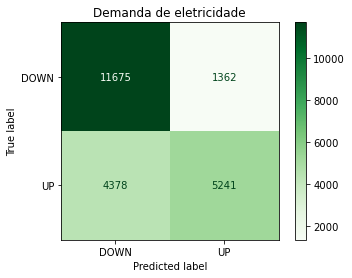

In [213]:
matriz = plot_confusion_matrix(classificador, x_test, y_test, cmap=plt.cm.Greens, 
display_labels=['DOWN', 'UP'])
plt.title('Demanda de eletricidade');

### Cálculo realizado para calcular a precisão do algoritmo:
(Esse cálculo é feito na utilização da função accuracy_score() do sklearn)

In [210]:
tp = 16916 # true positive
fp = 4378 + 1362 # false positive

In [211]:
eficacia = tp/(tp+fp)

In [212]:
print('Precisão: {:.1f}%'.format(eficacia*100))

Precisão: 74.7%


Perceba que o resultado foi exatamente o mesmo de quando se utilizou a função